In [66]:
import mlrose_hiive as mh

In [1]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

from IPython.core.display import display, HTML # for some notebook formatting.

import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

/var/folders/c6/5zg6wy5n121f2pzclkwbzplm0000gn/T/ipykernel_37413/1000570959.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML # for some notebook formatting.


In [2]:
import pandas as pd

In [34]:
# # Flip Flop with problem size 7
problem_ffp_tiny = mh.FlipFlopGenerator().generate(seed=0, size=7)
#state = problem_ffp.get_state()

In [136]:
# GA runner class
# 1. tune population size and mutation rates
ga_ffp = mh.GARunner(problem=problem_ffp_tiny,
              experiment_name='ffp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=0,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[3, 5], # 20 bits in total
              mutation_rates=[0.4, 0.5]) # Probability of a mutation at each element of the state vector during reproduction, expressed as a value between 0 and 1.

# the two data frames will contain the results
df_run_stats_ffp, df_run_curves_ffp = ga_ffp.run()

In [137]:
df_run_curves_ffp.shape

(8, 7)

In [138]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.000387,2.0,0.0,3,0.4,2048
1,1,0.005547,6.0,2.0,3,0.4,2048
2,0,0.000387,2.0,0.0,3,0.5,2048
3,1,0.005547,6.0,2.0,3,0.5,2048
4,0,0.000387,2.0,0.0,5,0.4,2048


In [139]:
df_run_curves_ffp['Fitness'].max()

6.0

In [140]:
# need to check Time and FEvals

In [141]:
df_run_curves_ffp.dtypes

Iteration            int64
Time               float64
Fitness            float64
FEvals             float64
Population Size      int64
Mutation Rate      float64
max_iters            int64
dtype: object

In [142]:
df_curves_bestfitness_ffp = df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

In [143]:
df_curves_bestfitness_ffp

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
1,1,0.005547,6.0,2.0,3,0.4,2048
3,1,0.005547,6.0,2.0,3,0.5,2048
5,1,0.005547,6.0,2.0,5,0.4,2048
7,1,0.005547,6.0,2.0,5,0.5,2048


In [144]:
df_curves_bestfitness_ffp.groupby(['Population Size', 'Mutation Rate']).agg({'FEvals': 'min', 'Iteration': 'mean', 'Time': 'min'}).reset_index()
# Temp = 1 => less Fevals. Pick temp=1

,Population Size,Mutation Rate,FEvals,Iteration,Time
0,3,0.4,2.0,1.0,0.005547
1,3,0.5,2.0,1.0,0.005547
2,5,0.4,2.0,1.0,0.005547
3,5,0.5,2.0,1.0,0.005547


In [16]:
# pick anything as they're equivalent

In [146]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.000387,2.0,0.0,3,0.4,2048
1,1,0.005547,6.0,2.0,3,0.4,2048
2,0,0.000387,2.0,0.0,3,0.5,2048
3,1,0.005547,6.0,2.0,3,0.5,2048
4,0,0.000387,2.0,0.0,5,0.4,2048


In [32]:
# clean up an existing result table to store the iterative resutls
df_iter_curves_ffp = df_run_curves_ffp.drop(df_run_curves_ffp.index, inplace=False)

In [35]:
# GA runner
# 2. iterate through 10 seeds
for s in range(10):
    ga_ffp = mh.GARunner(problem=problem_ffp_tiny,
              experiment_name='ffp_ga_{s}',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=s,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[3],
              mutation_rates=[0.4])

    # the two data frames will contain the results
    df_run_stats_ffp_sub, df_run_curves_ffp_sub = ga_ffp.run()
    # append to the result df
    df_iter_curves_ffp = pd.concat([df_iter_curves_ffp, df_run_curves_ffp_sub])

In [84]:
#df_iter_curves_ffp.to_csv('ga-flip-flop-ps7.csv')

In [4]:
df_iter_curves_ffp = pd.read_csv('../../csv-files/ga-flip-flop-ps7.csv')

In [36]:
df_iter_curves_ffp.shape

(475, 7)

In [37]:
df_iter_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.000661,2.0,0.0,3,0.4,2048
1,1,0.010819,6.0,2.0,3,0.4,2048
0,0,0.000367,2.0,0.0,3,0.4,2048
1,1,0.006227,4.0,2.0,3,0.4,2048
2,2,0.010208,4.0,3.0,3,0.4,2048


In [38]:
df_iter_curves_ffp.Iteration.max()

88

In [5]:
df_fitness_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_fitness=('Fitness', 'mean'), var_fitness = ('Fitness', 'var'))\
                                .reset_index()

In [153]:
df_fitness_iter_ffp.shape

(89, 3)

In [154]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness
0,0,2.900,0.544444
1,1,4.700,0.677778
2,2,4.500,0.285714
3,3,4.625,0.267857
4,4,4.625,0.267857


In [155]:
df_iter_curves_ffp.Fitness.max()

6.0

In [160]:
# semi-converge point
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == df_iter_curves_ffp.Fitness.max()-1].Iteration.min()

10

In [6]:
df_fitness_iter_ffp['stddev_fitness'] = df_fitness_iter_ffp['var_fitness'].apply(np.sqrt)

In [7]:
df_fitness_iter_ffp[df_fitness_iter_ffp.stddev_fitness > 0]

,Iteration,avg_fitness,var_fitness,stddev_fitness
0,0,2.900000,0.544444,0.737865
1,1,4.700000,0.677778,0.823273
2,2,4.500000,0.285714,0.534522
3,3,4.625000,0.267857,0.517549
4,4,4.625000,0.267857,0.517549
5,5,4.625000,0.267857,0.517549
6,6,4.750000,0.214286,0.462910
7,7,4.750000,0.214286,0.462910
8,8,4.750000,0.214286,0.462910
9,9,4.875000,0.125000,0.353553


In [9]:
np.mean(df_fitness_iter_ffp[(df_fitness_iter_ffp.stddev_fitness > 0) & (df_fitness_iter_ffp.Iteration <=19)].stddev_fitness)

0.5390590922318432

In [158]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness,stddev_fitness
0,0,2.900,0.544444,0.737865
1,1,4.700,0.677778,0.823273
2,2,4.500,0.285714,0.534522
3,3,4.625,0.267857,0.517549
4,4,4.625,0.267857,0.517549


Text(0, 0.5, 'Fitness')

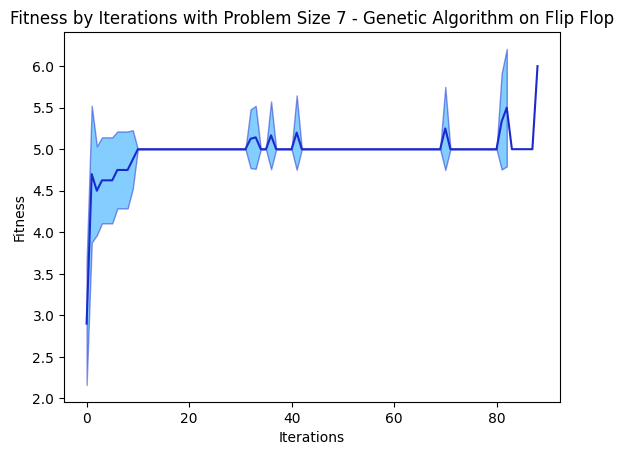

In [41]:
plt.plot(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness, 'k', color='#1B2ACC')
plt.fill_between(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness - df_fitness_iter_ffp.stddev_fitness\
                 , df_fitness_iter_ffp.avg_fitness + df_fitness_iter_ffp.stddev_fitness\
                 , alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.title('Fitness by Iterations with Problem Size 7 - Genetic Algorithm on Flip Flop')
plt.xlabel('Iterations')
plt.ylabel('Fitness')

In [71]:
# Fevals - iteration

In [10]:
df_FEvals_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_FEvals=('FEvals', 'mean'), var_FEvals = ('FEvals', 'var'))\
                                .reset_index()

In [43]:
df_FEvals_iter_ffp.shape

(89, 3)

In [44]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals
0,0,0.000,0.000000
1,1,1.900,0.100000
2,2,3.000,0.285714
3,3,4.125,0.410714
4,4,5.125,0.410714


In [12]:
df_FEvals_iter_ffp['stddev_FEvals'] = df_FEvals_iter_ffp['var_FEvals'].apply(np.sqrt)

In [46]:
df_FEvals_iter_ffp['stddev_FEvals'].min(), df_FEvals_iter_ffp['stddev_FEvals'].max()

(0.0, 1.4142135623730951)

In [13]:
df_FEvals_iter_ffp[df_FEvals_iter_ffp.Iteration == 35]

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
35,35,36.333333,0.266667,0.516398


In [47]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
0,0,0.000,0.000000,0.000000
1,1,1.900,0.100000,0.316228
2,2,3.000,0.285714,0.534522
3,3,4.125,0.410714,0.640870
4,4,5.125,0.410714,0.640870


Text(0, 0.5, 'FEvals')

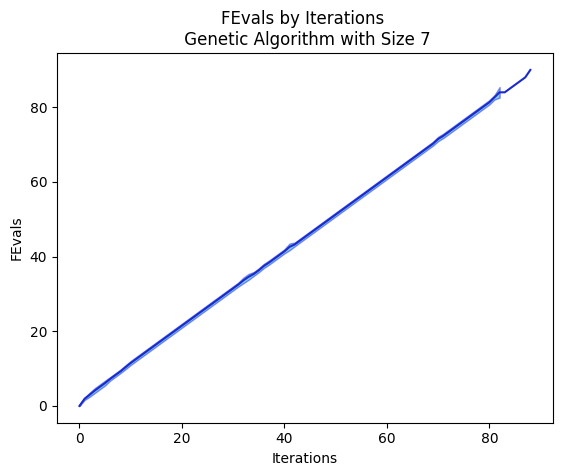

In [48]:
plt.plot(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals, 'k', color='#1B2ACC')
plt.fill_between(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals - df_FEvals_iter_ffp.stddev_FEvals\
                 , df_FEvals_iter_ffp.avg_FEvals + df_FEvals_iter_ffp.stddev_FEvals\
                 , alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.title('FEvals by Iterations \n Genetic Algorithm with Size 7')
plt.xlabel('Iterations')
plt.ylabel('FEvals')

In [49]:
df_FEvals_iter_ffp[df_FEvals_iter_ffp.Iteration == 80]

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
80,80,81.333333,0.333333,0.57735


In [50]:
df_FEvals_iter_ffp[df_FEvals_iter_ffp.stddev_FEvals == 0]['Iteration']

0    0
Name: Iteration, dtype: int64

In [51]:
# fitness - wall clock time

In [14]:
df_time_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_time=('Time', 'mean'), var_time = ('Time', 'var'))\
                                .reset_index()

In [65]:
df_time_iter_ffp.shape

(89, 3)

In [54]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time
0,0,0.000411,3.544830e-08
1,1,0.006347,1.334949e-05
2,2,0.008828,5.944253e-06
3,3,0.013178,7.016772e-06
4,4,0.013771,7.706788e-06


In [15]:
df_time_iter_ffp['stddev_time'] = df_time_iter_ffp['var_time'].apply(np.sqrt)

In [56]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time,stddev_time
0,0,0.000411,3.544830e-08,0.000188
1,1,0.006347,1.334949e-05,0.003654
2,2,0.008828,5.944253e-06,0.002438
3,3,0.013178,7.016772e-06,0.002649
4,4,0.013771,7.706788e-06,0.002776


In [58]:
df_time_iter_ffp.stddev_time.max()

0.029040613880602105

Text(0, 0.5, 'Time')

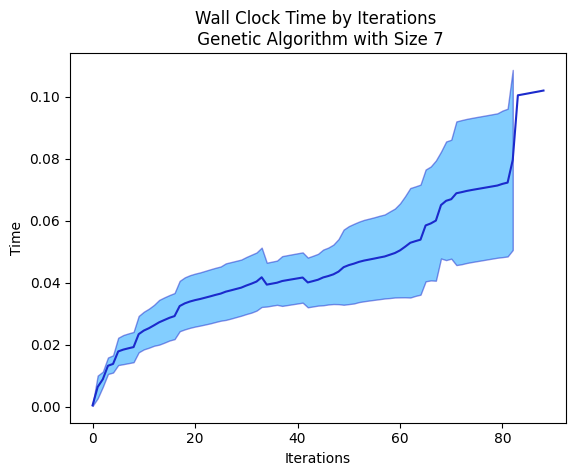

In [59]:
plt.plot(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time, 'k', color='#1B2ACC')
plt.fill_between(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time - df_time_iter_ffp.stddev_time\
                 , df_time_iter_ffp.avg_time + df_time_iter_ffp.stddev_time\
                 , alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.title('Wall Clock Time by Iterations \n Genetic Algorithm with Size 7')
plt.xlabel('Iterations')
plt.ylabel('Time')

In [60]:
df_time_iter_ffp[df_time_iter_ffp.stddev_time==df_time_iter_ffp.stddev_time.max()].Iteration

82    82
Name: Iteration, dtype: int64

In [63]:
df_time_iter_ffp[df_time_iter_ffp.var_time.isna()].Iteration.min()

83

In [16]:
df_time_iter_ffp[df_time_iter_ffp.Iteration == 35]

,Iteration,avg_time,var_time,stddev_time
35,35,0.039655,0.00005,0.007094


In [61]:
df_time_iter_ffp.avg_time.max()

0.10194139802479185

In [17]:
df_time_iter_ffp.stddev_time.min(), df_time_iter_ffp.stddev_time.max(), np.mean(df_time_iter_ffp.stddev_time)

(0.00018827718055751633, 0.02904061388060214, 0.011886967202678143)

In [62]:
df_iter_curves_ffp.groupby(['Iteration']).aggregate('count') #84 => 1 iter

,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
Iteration,,,,,,
0,10,10,10,10,10,10
1,10,10,10,10,10,10
2,8,8,8,8,8,8
3,8,8,8,8,8,8
4,8,8,8,8,8,8
...,...,...,...,...,...,...
84,1,1,1,1,1,1
85,1,1,1,1,1,1
86,1,1,1,1,1,1
